In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction.image import reconstruct_from_patches_2d
from sklearn.metrics import balanced_accuracy_score
from skimage.color import rgb2gray
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


(50700, 75)
(50700,)
(40560, 75)
(40560,)
Class 0:  1248
Class 1:  32327
Class 2:  6985


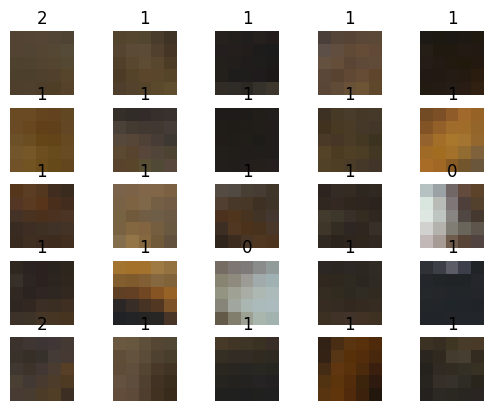

In [3]:
Xtrain = np.load('Xtrain_Classification2.npy')
Ytrain = np.load('Ytrain_Classification2.npy')

print(Xtrain.shape)
print(Ytrain.shape)

# Convert to grayscale

# Xtrain = Xtrain.reshape(75, 676, 5, 5, 3)

# Xtrain = rgb2gray(Xtrain)

# Xtrain = Xtrain.reshape(50700, 25)

x_train, x_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)

# Count the number of each class

class_0 = np.sum(np.where(y_train == 0, 1, 0))
class_1 = np.sum(np.where(y_train == 1, 1, 0))
class_2 = np.sum(np.where(y_train == 2, 1, 0))
print('Class 0: ', class_0)
print('Class 1: ', class_1)
print('Class 2: ', class_2)

# Show some images

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i].reshape(5, 5, 3))
    plt.title(y_train[i])
    plt.axis('off')


In [4]:
# Random over-sampling

ros = RandomOverSampler(random_state=42)
x_train, y_train = ros.fit_resample(x_train, y_train)

class_0 = np.sum(np.where(y_train == 0, 1, 0))
class_1 = np.sum(np.where(y_train == 1, 1, 0))
class_2 = np.sum(np.where(y_train == 2, 1, 0))
print('Class 0: ', class_0)
print('Class 1: ', class_1)
print('Class 2: ', class_2)


Class 0:  32327
Class 1:  32327
Class 2:  32327


In [5]:
# Normalize the data

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test = x_test / 255

In [21]:
svc = SVC(class_weight='balanced', cache_size=2000, C=0.7, shrinking=True)
svc.fit(x_train, y_train)

print(balanced_accuracy_score(y_train, svc.predict(x_train)))
print(balanced_accuracy_score(y_test, svc.predict(x_test)))

0.8868231921716624
0.8796475024604368


In [11]:
tree = DecisionTreeClassifier(class_weight='balanced', ccp_alpha=0.0002)

ccp_alphas = np.linspace(0.0001, 0.0005, 10)
best_tree = GridSearchCV(tree, param_grid={'ccp_alpha': ccp_alphas}, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=2)
best_tree.fit(x_train, y_train)

print(balanced_accuracy_score(y_train, best_tree.predict(x_train)))
print(balanced_accuracy_score(y_test, best_tree.predict(x_test)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.9406687907940731
0.8350241709638192


In [6]:
forest = RandomForestClassifier(class_weight='balanced', n_estimators=100)

ccp_alphas = np.linspace(0.0001, 0.0005, 10)
best_forest = GridSearchCV(forest, {'ccp_alpha': ccp_alphas}, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=2)
best_forest.fit(x_train, y_train)

print(balanced_accuracy_score(y_train, best_forest.predict(x_train)))
print(balanced_accuracy_score(y_test, best_forest.predict(x_test)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.9600024747115414
0.8883743433524995


In [7]:
print(best_forest.best_params_)

{'ccp_alpha': 0.0001}


In [6]:
kneighbours = KNeighborsClassifier(n_neighbors=3, weights='distance')
kneighbours.fit(x_train, y_train)

print(balanced_accuracy_score(y_train, kneighbours.predict(x_train)))
print(balanced_accuracy_score(y_test, kneighbours.predict(x_test)))

1.0
0.9093748360289986


In [13]:
# Save the model

# pickle.dump(kneighbours, open('kneighbours_score_0909.sav', 'wb'))